In [97]:
#pip install billboard.py 
import billboard
import pandas as pd

In [98]:
def get_chart(chartname):
    """
    Get the chart data
    
    Params: 
        chartname: Name of the wanted chart
        
    Return: Chart data
    """
    
    chart = billboard.ChartData(chartname) #get chart data
    return chart

hot100 = get_chart('hot-100') #get 'Hot 100' chart
songsales = get_chart('digital-song-sales') #get 'Digital Song Sales' chart

In [99]:
def process_chart(chart):
    """
    Generate a dictionary to store the chart's data
    
    Params:
        chart: The chart data from previous step
        
    Return: A dictionary of lists with data of the chart
    """
    
    chartD = {} #create an empty dictionary
    
    #Create multiple empty lists so that we can build a DoL later
    title = []
    artist = []
    rank = []
    peakPos = []
    lastPos = []
    weeks = []
    isNew = []
    
    #Use a for loop to get and append data to lists
    for i in range(len(chart)):
        title.append(chart[i].title) #get song's title
        artist.append(chart[i].artist) #name of artist
        rank.append(chart[i].rank) #get song's current rank
        peakPos.append(chart[i].peakPos) #track's peak position on the chart as of the chart date
        lastPos.append(chart[i].lastPos) #track's position the previous week
        weeks.append(chart[i].weeks) #number of weeks that track has been on the chart
        isNew.append(chart[i].isNew) #whether track is new to the chart or not
    
    #Build DoL
    chartD['Rank'] = rank
    chartD['Song Title'] = title
    chartD['Artist'] = artist
    chartD['New To Chart'] = isNew
    chartD['Peak Position'] = peakPos
    chartD['Position Last Week'] = lastPos
    chartD['Weeks On Chart'] = weeks
    return chartD

hot100D = process_chart(hot100)
songsalesD = process_chart(songsales)

In [100]:
def build_df(chartD):
    """
    Build a data frame from the DoL
    
    Params: 
        chartD: A DoL with chart's data
        
    Return: A data frame for each chart
    """
    
    df = pd.DataFrame(chartD) #build data frame
    df = df.set_index('Rank') #set data frame's index
    return df

In [101]:
hot100DF = build_df(hot100D)
hot100DF.head(5) #show the first 5 rows of data frame

,Song Title,Artist,New To Chart,Peak Position,Position Last Week,Weeks On Chart
Rank,,,,,,
1,Save Your Tears,The Weeknd & Ariana Grande,False,1,1,21
2,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),False,1,2,9
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,False,1,3,7
4,Levitating,Dua Lipa Featuring DaBaby,False,4,5,31
5,Kiss Me More,Doja Cat Featuring SZA,False,5,6,4


FD: 

Song Title -> Rank, Artist, New To Chart, Peak Position, Position Last Week, Weeks On Chart

In [102]:
songsalesDF = build_df(songsalesD)
songsalesDF.head(5) #show the first 5 rows of data frame

,Song Title,Artist,New To Chart,Peak Position,Position Last Week,Weeks On Chart
Rank,,,,,,
1,Astronaut In The Ocean,Masked Wolf,False,1,2,12
2,Levitating,Dua Lipa Featuring DaBaby,False,2,4,32
3,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),False,2,3,9
4,Save Your Tears,The Weeknd & Ariana Grande,False,1,1,18
5,Without You,The Kid LAROI & Miley Cyrus,False,5,50,7


FD: 

Song Title -> Rank, Artist, New To Chart, Peak Position, Position Last Week, Weeks On Chart

In [103]:
def to_csv():
    """
    Generate a CSV file of the data frame in the current folder 
    
    Params: None
    
    Return: None
    """
    hot100DF.to_csv("hot100.csv")
    songsalesDF.to_csv("songsales.csv")
to_csv()

In [108]:
def myhistogram(value_set, bins=25): 
    """
    Create, compute, and returns a list of histogram counts. 
    Parameters: 
        value_set: the set of values to compute histogram bins. 
        bins: the specified number of bins. 
    Return: the list of histogram counts.
    """
    # Compute max, min, range value
    value_max = max(value_set)
    value_min = min(value_set)
    value_range = value_max - value_min
    
    # Compute interval and value of the bin corresponding to the value
    interval = value_range / bins
    value_bin = lambda x, interval: int((x - value_min)//interval) if x != value_max else int((x - value_min)/interval - 1)
    
    hist_count = [0 for i in range(bins)] #populate the initial list
    
    # Generate values for the histogram
    for value in value_set:
        b = value_bin(value, interval)
        hist_count[b] += 1
    return hist_count

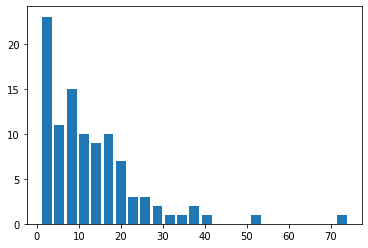

In [109]:
import matplotlib.pyplot as pyplot

# Read the csv file, get a list of the popularity column and calculate bins
num_bins = 25
df = pd.read_csv("hot100.csv")
val_list = list(df['Weeks On Chart'])
bin_values = myhistogram(val_list, num_bins)

#Use matplotlib to show the graph
bins = num_bins
interval = (max(val_list) - min(val_list)) / num_bins
x_values = [min(val_list) + (i * interval) + interval/2 for i in range(bins)]
pyplot.bar(x_values, bin_values, width=(0.8 * interval))
pyplot.show()